# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [ ]:
# Import the requests library to make HTTP requests to web pages
import requests

# Import BeautifulSoup from bs4 to parse and extract information from HTML content
from bs4 import BeautifulSoup

# Import pandas for creating and manipulating structured data (e.g., DataFrames)
import pandas as pd


In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [ ]:
# Create an empty DataFrame using pandas
df = pd.DataFrame()

# Assign the list of reviews (assumed to be defined earlier) to a new column named "reviews"
df["reviews"] = reviews

# Display the first few rows of the DataFrame to verify the data
df.head()

,reviews
0,"✅ Trip Verified | I had only 1 bag with me, ..."
1,✅ Trip Verified | Check in and security at T5 ...
2,Not Verified | LHR T5 BA Gold Wing worked wel...
3,Not Verified | Very good service on this rout...
4,✅ Trip Verified | Flight mainly let down by ...


In [ ]:
# Import the os module for interacting with the operating system (e.g., creating directories)
import os

# Create a folder named "data" if it doesn't already exist
os.makedirs("data", exist_ok=True)

# Save the DataFrame to a CSV file in the "data" directory
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [ ]:
df

,reviews
0,"✅ Trip Verified | I had only 1 bag with me, ..."
1,✅ Trip Verified | Check in and security at T5 ...
2,Not Verified | LHR T5 BA Gold Wing worked wel...
3,Not Verified | Very good service on this rout...
4,✅ Trip Verified | Flight mainly let down by ...
...,...
995,✅ Trip Verified | London to Bangkok. What an ...
996,✅ Trip Verified | Belfast to San Francisco vi...
997,✅ Trip Verified | London to Gothenburg. BA ar...
998,✅ Trip Verified | Orlando to Gatwick. Terribl...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [ ]:


# Read the CSV file containing the reviews into a pandas DataFrame
df = pd.read_csv("data/BA_reviews.csv")

# Print the shape of the DataFrame (number of rows, number of columns)
print("Shape:", df.shape)

# Drop any rows from the DataFrame that contain missing (NaN) values
df = df.dropna()

# Display the first few rows of the cleaned DataFrame
df.head()


Shape: (1000, 2)


,Unnamed: 0,reviews
0,0,"✅ Trip Verified | I had only 1 bag with me, ..."
1,1,✅ Trip Verified | Check in and security at T5 ...
2,2,Not Verified | LHR T5 BA Gold Wing worked wel...
3,3,Not Verified | Very good service on this rout...
4,4,✅ Trip Verified | Flight mainly let down by ...


In [ ]:
# Step 2: Clean Reviews
import re  # Import the 're' module

def clean_text(text):
    text = str(text).lower()

    # Remove unwanted phrases
    text = text.replace("trip verified", "")
    text = text.replace("not verified", "")

    # Remove punctuation & numbers
    text = re.sub(r'[^a-z\s]', '', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [ ]:
# Step 3: Sentiment Analysis using VADER
!pip install vaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# Apply the clean_text function to the 'reviews' column and store the result in 'cleaned_reviews'
df["cleaned_reviews"] = df["reviews"].apply(clean_text)

df["sentiment_score"] = df["cleaned_reviews"].apply(lambda x: analyzer.polarity_scores(x)["compound"])
df["sentiment_label"] = df["sentiment_score"].apply(lambda x: "positive" if x > 0.05 else "negative" if x < -0.05 else "neutral")

df["sentiment_label"].value_counts()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.7 MB/s eta 0:00:00


,count
sentiment_label,
negative,528
positive,454
neutral,18


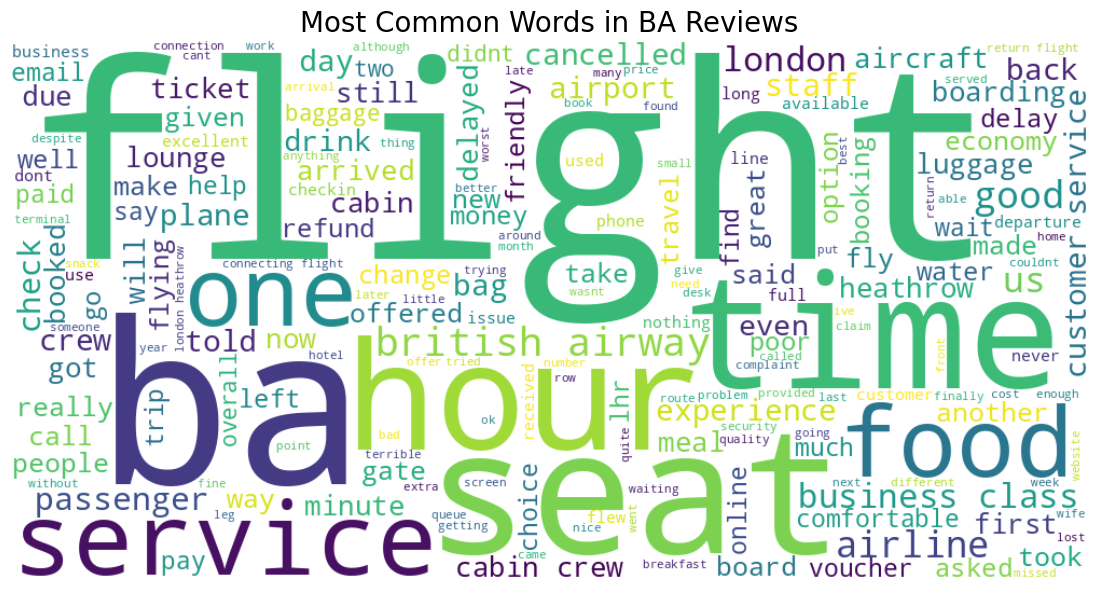

In [ ]:
# Step 4: Word Cloud
!pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = " ".join(df["cleaned_reviews"])

wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in BA Reviews", fontsize=20)
plt.show()

<ipython-input-11-2de1a63f1e84>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="sentiment_label", palette="coolwarm")


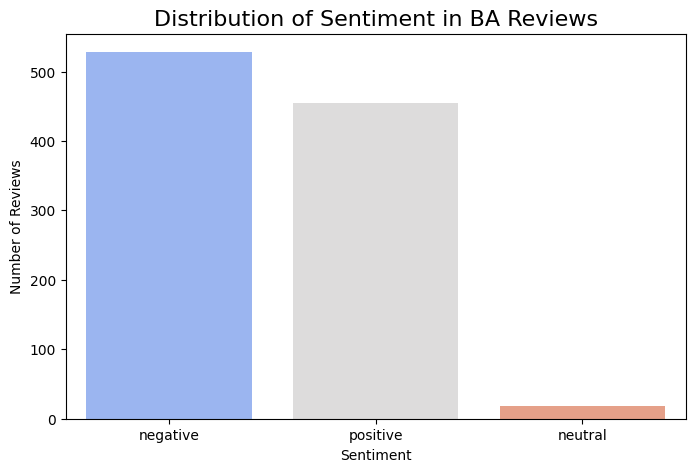

In [ ]:
# Step 5: Visualization of Sentiments
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x="sentiment_label", palette="coolwarm")
plt.title("Distribution of Sentiment in BA Reviews", fontsize=16)
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()


In [ ]:
df

,Unnamed: 0,reviews,cleaned_reviews,sentiment_score,sentiment_label
0,0,"✅ Trip Verified | I had only 1 bag with me, ...",i had only bag with me a carry on trolley ever...,-0.7425,negative
1,1,✅ Trip Verified | Check in and security at T5 ...,check in and security at t quick both gallerie...,0.8360,positive
2,2,Not Verified | LHR T5 BA Gold Wing worked wel...,lhr t ba gold wing worked well pleasant check ...,0.9951,positive
3,3,Not Verified | Very good service on this rout...,very good service on this route ba th march ca...,-0.7357,negative
4,4,✅ Trip Verified | Flight mainly let down by ...,flight mainly let down by a disagreeable fligh...,-0.4323,negative
...,...,...,...,...,...
995,995,✅ Trip Verified | London to Bangkok. What an ...,london to bangkok what an awful plane seats ar...,-0.8896,negative
996,996,✅ Trip Verified | Belfast to San Francisco vi...,belfast to san francisco via london checkin at...,0.9642,positive
997,997,✅ Trip Verified | London to Gothenburg. BA ar...,london to gothenburg ba are getting a lot of b...,0.5984,positive
998,998,✅ Trip Verified | Orlando to Gatwick. Terribl...,orlando to gatwick terrible flight experience ...,-0.9169,negative


In [ ]:
# Display a concise summary of the DataFrame including column names, data types, and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1000 non-null   int64  
 1   reviews          1000 non-null   object 
 2   cleaned_reviews  1000 non-null   object 
 3   sentiment_score  1000 non-null   float64
 4   sentiment_label  1000 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 39.2+ KB


In [ ]:
# Calculate the percentage of each sentiment label in the dataset
# normalize=True returns relative frequencies, then multiplied by 100 to convert to percentage
sentiment_counts = df['sentiment_label'].value_counts(normalize=True) * 100
print(sentiment_counts)

sentiment_label
negative    52.8
positive    45.4
neutral      1.8
Name: proportion, dtype: float64


In [ ]:
# Import the Counter class from the collections module to count word occurrences
from collections import Counter

# Create a list of words from reviews labeled as 'positive'
# 1. Filter rows with positive sentiment
# 2. Join all cleaned review texts into one string
# 3. Split the string into individual words
positive_words = ' '.join(df[df['sentiment_label'] == 'positive']['cleaned_reviews']).split()

# Do the same for reviews labeled as 'negative'
negative_words = ' '.join(df[df['sentiment_label'] == 'negative']['cleaned_reviews']).split()

# Print the 10 most common words found in positive reviews
print("Top positive words:", Counter(positive_words).most_common(10))

# Print the 10 most common words found in negative reviews
print("Top negative words:", Counter(negative_words).most_common(10))


Top positive words: [('the', 3325), ('and', 2166), ('to', 2122), ('a', 1580), ('was', 1575), ('i', 1157), ('in', 956), ('of', 924), ('on', 847), ('flight', 800)]
Top negative words: [('the', 4019), ('to', 3356), ('and', 2405), ('i', 1972), ('a', 1827), ('was', 1666), ('of', 1164), ('flight', 1160), ('in', 1126), ('for', 1024)]


In [ ]:
# Import Counter to count word frequencies
from collections import Counter

# Import NLTK's list of common English stopwords
from nltk.corpus import stopwords

# Import nltk module and download the list of stopwords
import nltk
nltk.download('stopwords')

# Create a set of English stopwords for efficient lookup
stop_words = set(stopwords.words('english'))

# Tokenize positive reviews and remove stopwords
positive_words = [
    word
    for review in df[df['sentiment_label'] == 'positive']['cleaned_reviews']
    for word in review.split()               # Split each review into words
    if word not in stop_words               # Keep only non-stopword words
]

# Tokenize negative reviews and remove stopwords
negative_words = [
    word
    for review in df[df['sentiment_label'] == 'negative']['cleaned_reviews']
    for word in review.split()
    if word not in stop_words
]

# Print the 10 most frequent non-stopword words in positive reviews
print("Top positive words:", Counter(positive_words).most_common(10))

# Print the 10 most frequent non-stopword words in negative reviews
print("Top negative words:", Counter(negative_words).most_common(10))



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Top positive words: [('flight', 800), ('ba', 572), ('service', 338), ('good', 337), ('crew', 293), ('time', 289), ('food', 267), ('cabin', 219), ('seat', 206), ('class', 206)]
Top negative words: [('flight', 1160), ('ba', 719), ('service', 383), ('us', 293), ('british', 277), ('airways', 265), ('london', 265), ('hours', 256), ('one', 253), ('time', 251)]
